In [3]:
## importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## importing regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot


from scipy.cluster.hierarchy import dendrogram, linkage 

#ignore warning
import warnings
warnings.filterwarnings("ignore")

df= pd.read_csv("Walmart2.csv")
df.head()         

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,28-01-2011,1316899.31,0,43.83,3.010,212.197058,7.742
1,1,27-01-2012,1319325.59,0,54.26,3.290,220.078852,7.348
2,1,21-01-2011,1327405.42,0,44.04,3.016,211.827234,7.742
3,1,22-10-2010,1345454.00,0,69.86,2.725,211.861294,7.838
4,1,24-09-2010,1351791.03,0,80.94,2.624,211.597225,7.787


In [4]:
df.shape[1]

8

In [5]:
## Checking for Missing Data

for col in df.columns:
    print(col, df[col].isnull().sum())

Store 0
Date 0
Weekly_Sales 0
Holiday_Flag 0
Temperature 0
Fuel_Price 180
CPI 0
Unemployment 0


In [6]:
## Percentage of Missing Data

missing_percent = df.isnull().sum() * 100 / len(df)
missing_percent

Store           0.000000
Date            0.000000
Weekly_Sales    0.000000
Holiday_Flag    0.000000
Temperature     0.000000
Fuel_Price      2.797203
CPI             0.000000
Unemployment    0.000000
dtype: float64

In [7]:
## Checking numerical variables

num_var = list(set(df.columns) - set(df.dtypes[df.dtypes == object].index))
num_var

['Fuel_Price',
 'Store',
 'Unemployment',
 'Weekly_Sales',
 'CPI',
 'Holiday_Flag',
 'Temperature']

In [8]:
## Converting Holiday_Flag to string because it is a boolean

df['Holiday_Flag'] = df['Holiday_Flag'].astype('object') 

In [9]:
## Checking categorical variables

cat_var = list(set(df.dtypes[df.dtypes == object].index))
cat_var

['Holiday_Flag', 'Date']

In [10]:
## Rechecking numerical variables
num_var

['Fuel_Price',
 'Store',
 'Unemployment',
 'Weekly_Sales',
 'CPI',
 'Holiday_Flag',
 'Temperature']

In [11]:
df['Fuel_Price'].mean()

3.345970263788966

In [12]:
## Imputing missing variables

df[num_var] = df[num_var].fillna(df[num_var].median(), 
                                             inplace = False)


In [13]:
df['Fuel_Price'].mean()

3.347901165501176

In [14]:
## Rechecking for Missing Data

for col in df.columns:
    print(col, df[col].isnull().sum())

Store 0
Date 0
Weekly_Sales 0
Holiday_Flag 0
Temperature 0
Fuel_Price 0
CPI 0
Unemployment 0


In [15]:
## Gettting the variance of dataframe
df.var()

Store           1.686929e+02
Weekly_Sales    3.185097e+11
Holiday_Flag    6.504996e-02
Temperature     3.402155e+02
Fuel_Price      2.039790e-01
CPI             1.548951e+03
Unemployment    3.518944e+00
dtype: float64

In [16]:
## Getting the summary statistics of dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.347901e+00,0.451640,2.472,2.933,3.415000,3.717000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [17]:
## converting date object to datetime
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742
1,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348
2,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742
3,1,2010-10-22,1345454.00,0,69.86,2.725,211.861294,7.838
4,1,2010-09-24,1351791.03,0,80.94,2.624,211.597225,7.787


In [18]:
## Reframing the columns by breaking the date into days, weeks, month and year for analysis

df['weekday'] = df.Date.dt.weekday
df['week'] = df.Date.dt.week
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

#df.drop(['Date'], axis=1, inplace=True)#,'month'


Text(0.5, 1.0, 'Average Weekly Sales For 2010')

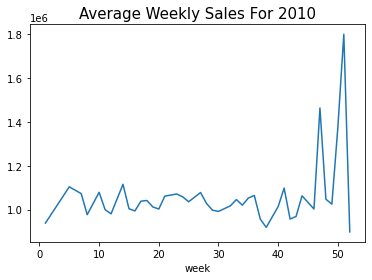

In [19]:
## Lineplot for Weekly sales for 2010

weekly_sales_2010 = df[df['year']==2010]['Weekly_Sales'].groupby(df['week']).mean()
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values) 
plt.title('Average Weekly Sales For 2010', fontsize=15)


Text(0.5, 1.0, 'Average Weekly Sales For 2011')

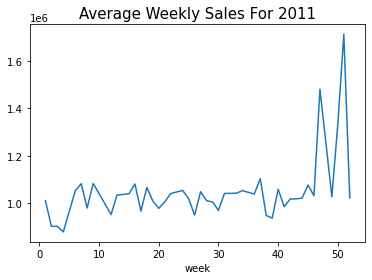

In [20]:
## Lineplot for Weekly Sales for 2011

weekly_sales_2011 = df[df['year']==2011]['Weekly_Sales'].groupby(df['week']).mean()
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values) # for plotting the lineplot
plt.title('Average Weekly Sales For 2011', fontsize=15)

Text(0.5, 1.0, 'Average Weekly Sales for 2012')

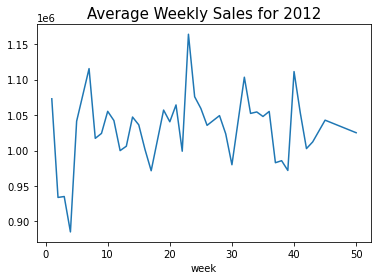

In [21]:
## Lineplot for Weekly Sales for 2012

weekly_sales_2012 = df[df['year']==2012]['Weekly_Sales'].groupby(df['week']).mean()
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.title('Average Weekly Sales for 2012', fontsize=15)

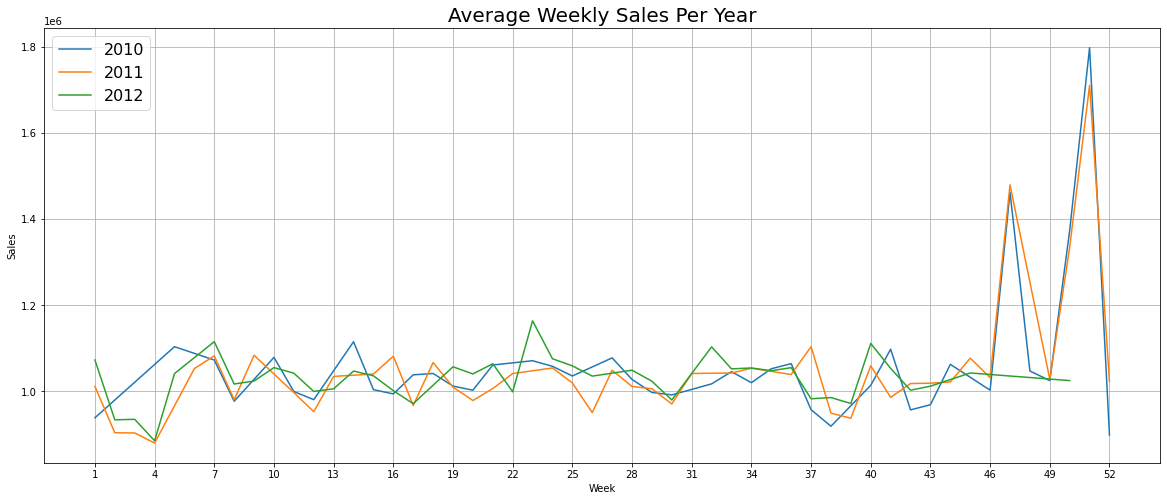

In [22]:
##Combined Weekly Sales to check for Seasonality

plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,53, step=3))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Week', fontsize=10)
plt.show()


In [23]:
target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,week,month,year
0,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742,4,4,1,2011
1,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,4,4,1,2012
2,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742,4,3,1,2011
3,1,2010-10-22,1345454.00,0,69.86,2.725,211.861294,7.838,4,42,10,2010
4,1,2010-09-24,1351791.03,0,80.94,2.624,211.597225,7.787,4,38,9,2010


Text(0.5, 1.0, 'Average Weekly Sales Per Store')

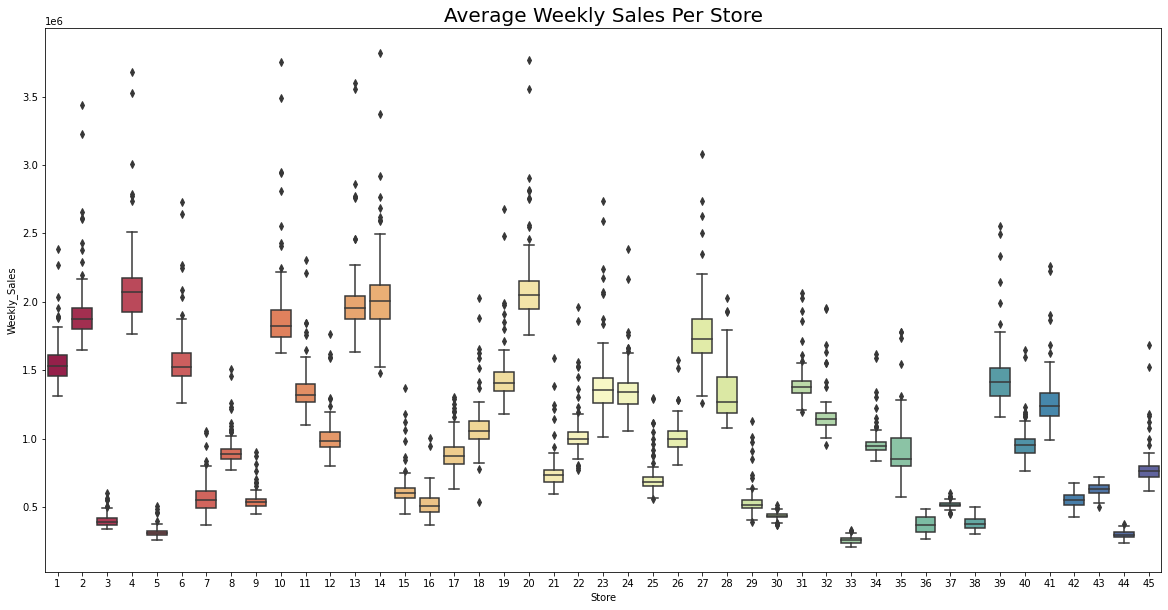

In [24]:
## Boxplot of sales across all Stores
f, ax = plt.subplots(figsize=(20, 10)) # defines the size of the plot
fig = sns.boxplot(x='Store', y="Weekly_Sales", data=df, palette = "Spectral") # plots the data on a box plot
plt.title('Average Weekly Sales Per Store', fontsize=20)




In [25]:
## Finding Correlation
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,week,month,year
Store,1.000000e+00,-0.335332,-6.709445e-16,-0.022659,0.059047,-0.209492,0.223531,-1.932759e-16,-1.505585e-15,6.445817e-16,8.316758e-13
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.008357,-0.072634,-0.106176,-2.104085e-02,6.610484e-02,6.753523e-02,-1.837754e-02
Holiday_Flag,-6.709445e-16,0.036891,1.000000e+00,-0.155091,-0.099087,-0.002162,0.010960,-9.100474e-02,3.288032e-01,3.322341e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.140770,0.176888,0.101158,1.833136e-02,7.318701e-02,6.643970e-02,6.426923e-02
Fuel_Price,5.904711e-02,0.008357,-9.908657e-02,0.140770,1.000000,-0.168256,-0.033115,1.642521e-02,-4.259395e-02,-5.498389e-02,7.614206e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.168256,1.000000,-0.302020,-9.595877e-03,2.782979e-03,1.478843e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.033115,-0.302020,1.000000,3.777320e-02,-6.038021e-03,-2.061552e-03,-2.418135e-01
weekday,-1.932759e-16,-0.021041,-9.100474e-02,0.018331,0.016425,-0.009596,0.037773,1.000000e+00,-1.283800e-01,-1.387259e-01,-9.923791e-02
week,-1.505585e-15,0.066105,3.288032e-01,0.073187,-0.042594,0.002783,-0.006038,-1.283800e-01,1.000000e+00,9.964777e-01,-1.269874e-01
month,6.445817e-16,0.067535,3.322341e-01,0.066440,-0.054984,0.001479,-0.002062,-1.387259e-01,9.964777e-01,1.000000e+00,-1.390145e-01


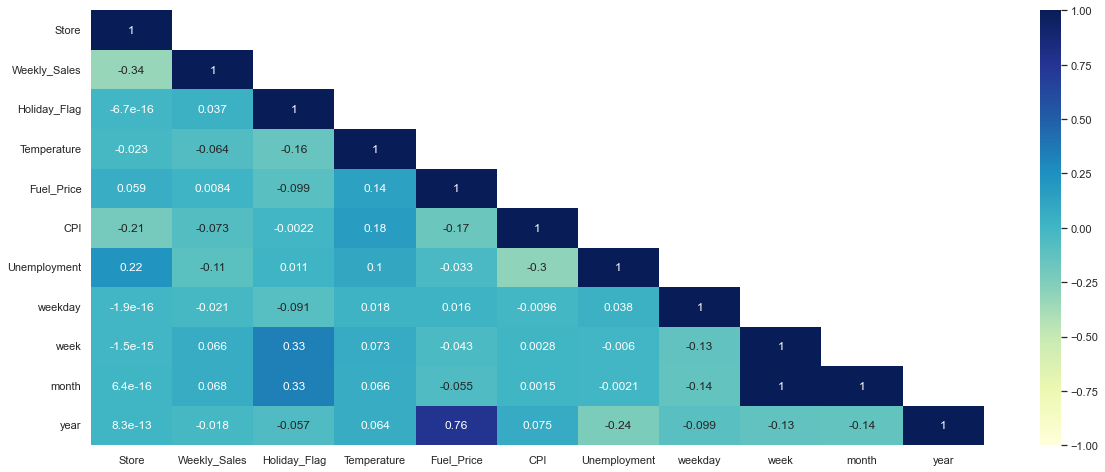

In [26]:
## Heatmap

df_corr=df.corr()
plt.figure(figsize=(20,8))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.set(style="white")
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='YlGnBu');


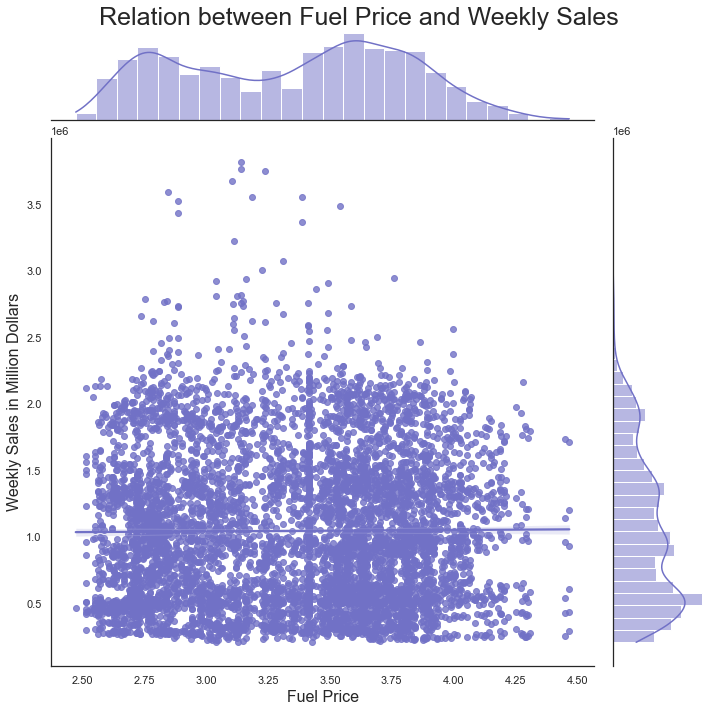

In [27]:
## Visualizing relationships among variables

ax = sns.jointplot(x='Fuel_Price',y='Weekly_Sales',data=df, kind='reg',
                  height = 10, color='#7171C6')
ax.fig.suptitle('Relation between Fuel Price and Weekly Sales',size = 25)
ax.fig.subplots_adjust(top=0.95)
ax.set_axis_labels('Fuel Price', 'Weekly Sales in Million Dollars', fontsize=16)
plt.show()
# It seems like higher fuel price will not influence weekly sales

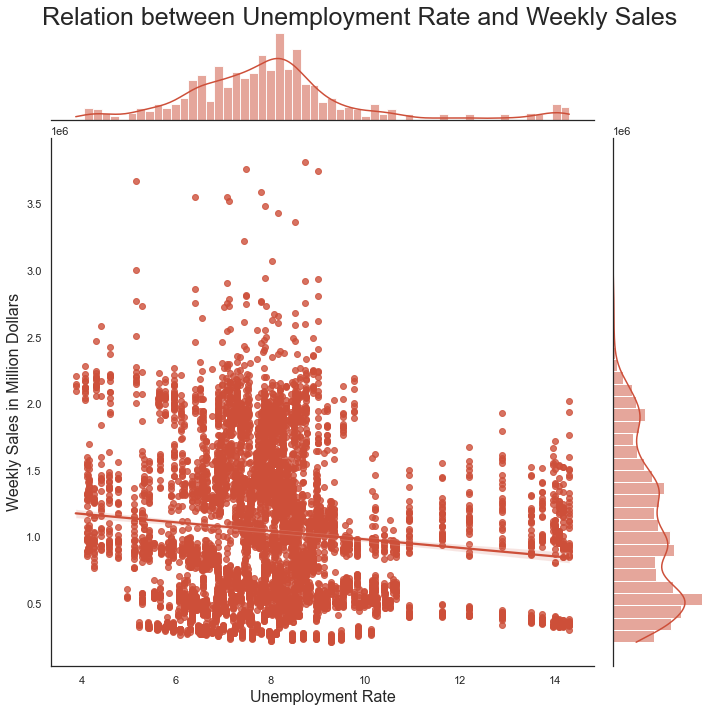

In [28]:
ax1 = sns.jointplot(x='Unemployment',y='Weekly_Sales',data=df, kind='reg',
                  height = 10, color = '#CD4F39')
ax1.fig.suptitle('Relation between Unemployment Rate and Weekly Sales',size = 25)
ax1.fig.subplots_adjust(top=0.95)
ax1.set_axis_labels('Unemployment Rate', 'Weekly Sales in Million Dollars', fontsize=16)
plt.show()

# It seems like the unemployment rate goes high will cause the weekly sales goes down.

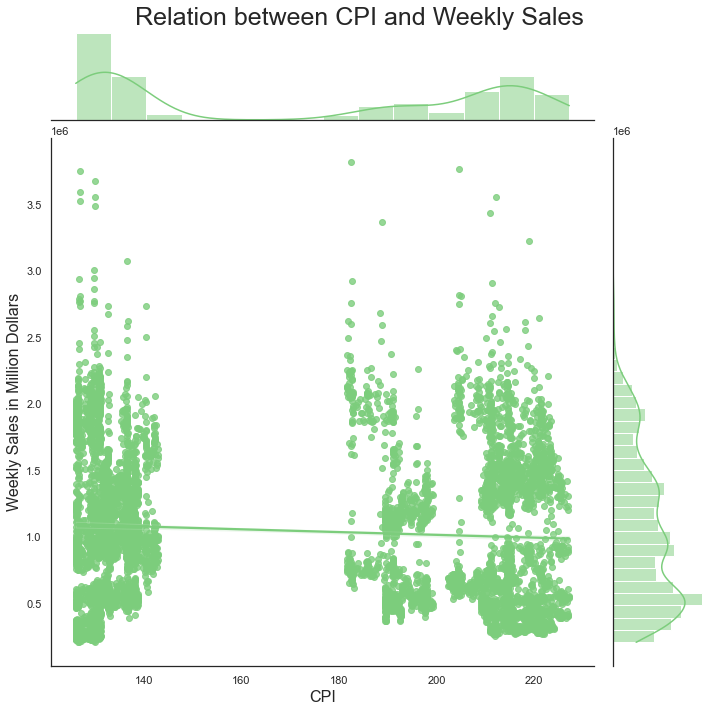

In [29]:
ax2 = sns.jointplot(x='CPI',y='Weekly_Sales',data=df, kind='reg',
                  height = 10, color='#7CCD7C')
ax2.fig.suptitle('Relation between CPI and Weekly Sales',size = 25)
ax2.fig.subplots_adjust(top=0.95)
ax2.set_axis_labels('CPI', 'Weekly Sales in Million Dollars', fontsize=16)
plt.show()

#The Data Source may not accurate since it is very wierd
#That the CPI distribution is not continuous

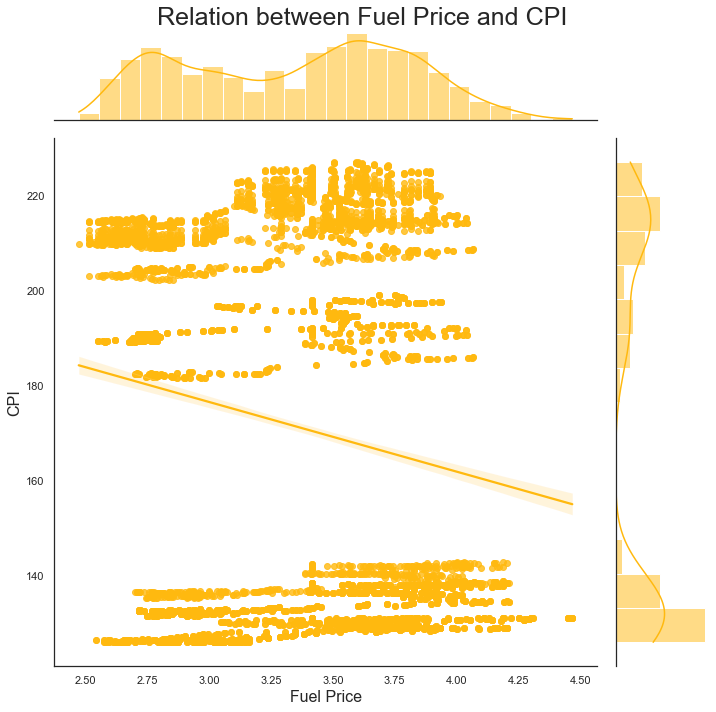

In [30]:
ax3 = sns.jointplot(x='Fuel_Price',y='CPI',data=df, kind='reg',
                  height = 10, color='#FFB90F')
ax3.fig.suptitle('Relation between Fuel Price and CPI',size = 25)
ax3.fig.subplots_adjust(top=0.95)
ax3.set_axis_labels('Fuel Price', 'CPI', fontsize=16)
plt.show()

#The Data Source may not accurate since it is very wierd
#That the CPI distribution is not continuous

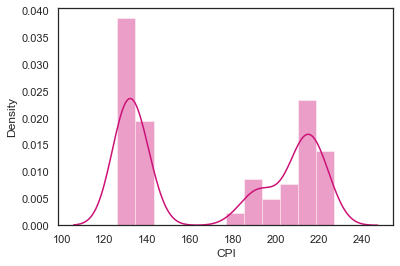

In [31]:
sns.distplot(df['CPI'], color = '#CD1076')
plt.show()

#The Data Source may not accurate since it is very wierd
#That the CPI distribution is not continuous, missing data near 142 - 165

In [32]:
medians = df.median()
medians

Store               23.000000
Weekly_Sales    960746.040000
Holiday_Flag         0.000000
Temperature         62.670000
Fuel_Price           3.415000
CPI                182.616521
Unemployment         7.874000
weekday              4.000000
week                26.000000
month                6.000000
year              2011.000000
dtype: float64

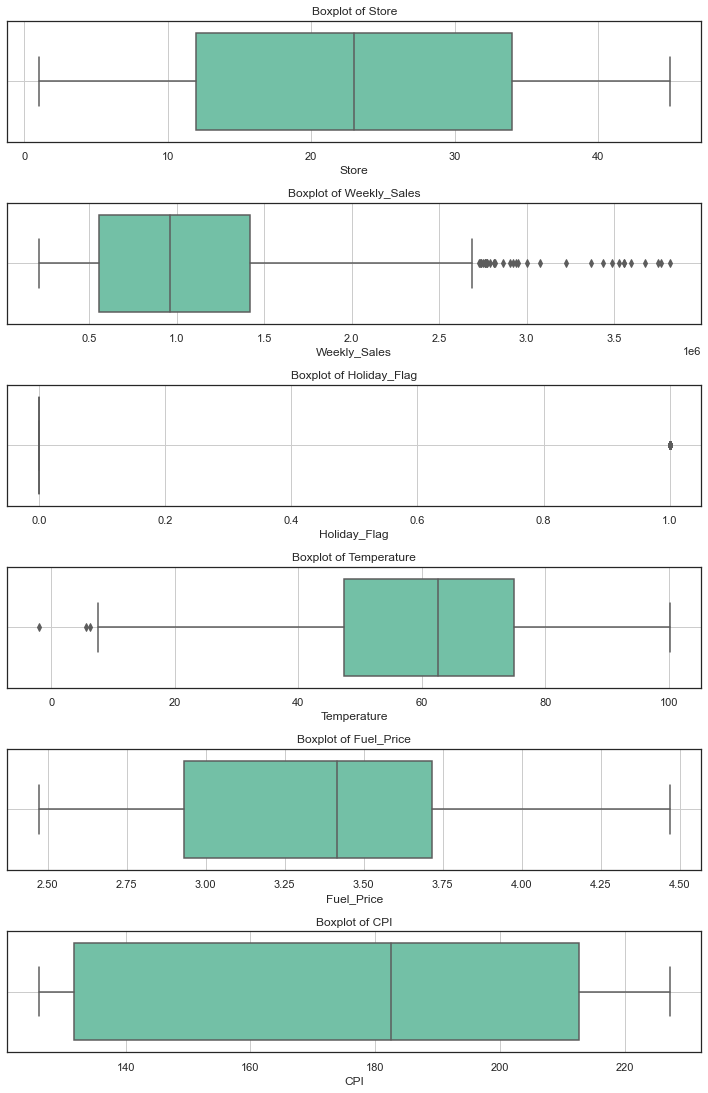

In [33]:
## Creating temporary df for barplots only

dftempbar = pd.read_csv("Walmart2.csv")
missing_percent = dftempbar.isnull().sum() * 100 / len(dftempbar)
num_var = list(set(dftempbar.columns) - set(dftempbar.dtypes[dftempbar.dtypes == object].index))
dftempbar['Holiday_Flag'] = dftempbar['Holiday_Flag'].astype('object')
cat_var = list(set(dftempbar.dtypes[dftempbar.dtypes == object].index))
dftempbar[num_var] = dftempbar[num_var].fillna(dftempbar[num_var].median(), 
                                             inplace = False)
dftempbar['Date'] = pd.to_datetime(dftempbar.Date)
dftempbar['weekday'] = dftempbar.Date.dt.weekday
dftempbar['week'] = dftempbar.Date.dt.week
dftempbar['month'] = dftempbar.Date.dt.month
dftempbar['year'] = dftempbar.Date.dt.year

dftempbar.drop(['Date'], axis=1, inplace=True)#,'month'

## Checking for Outliers Using Boxplots
plt.figure(figsize=(10,25))
list_of_column=dftempbar.columns[0:6]
medians = dftempbar.median()

list_of_column
for i in range(len(list_of_column)):
    plt.subplot(10,1,i+1)
    sns.boxplot(x = dftempbar[list_of_column[i]],data=dftempbar,color='#66CDAA')
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.grid()
    plt.tight_layout()

In [34]:
dfnew = df.loc[(df['Store']== 1)]
#dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
dfnew

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,week,month,year
0,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742,4,4,1,2011
1,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,4,4,1,2012
2,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742,4,3,1,2011
3,1,2010-10-22,1345454.00,0,69.86,2.725,211.861294,7.838,4,42,10,2010
4,1,2010-09-24,1351791.03,0,80.94,2.624,211.597225,7.787,4,38,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-06-04,1899676.88,0,70.43,3.891,221.435611,7.143,0,23,6,2012
139,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,4,47,11,2010
140,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866,4,47,11,2011
141,1,2011-12-23,2270188.99,0,47.96,3.112,219.357722,7.866,4,51,12,2011


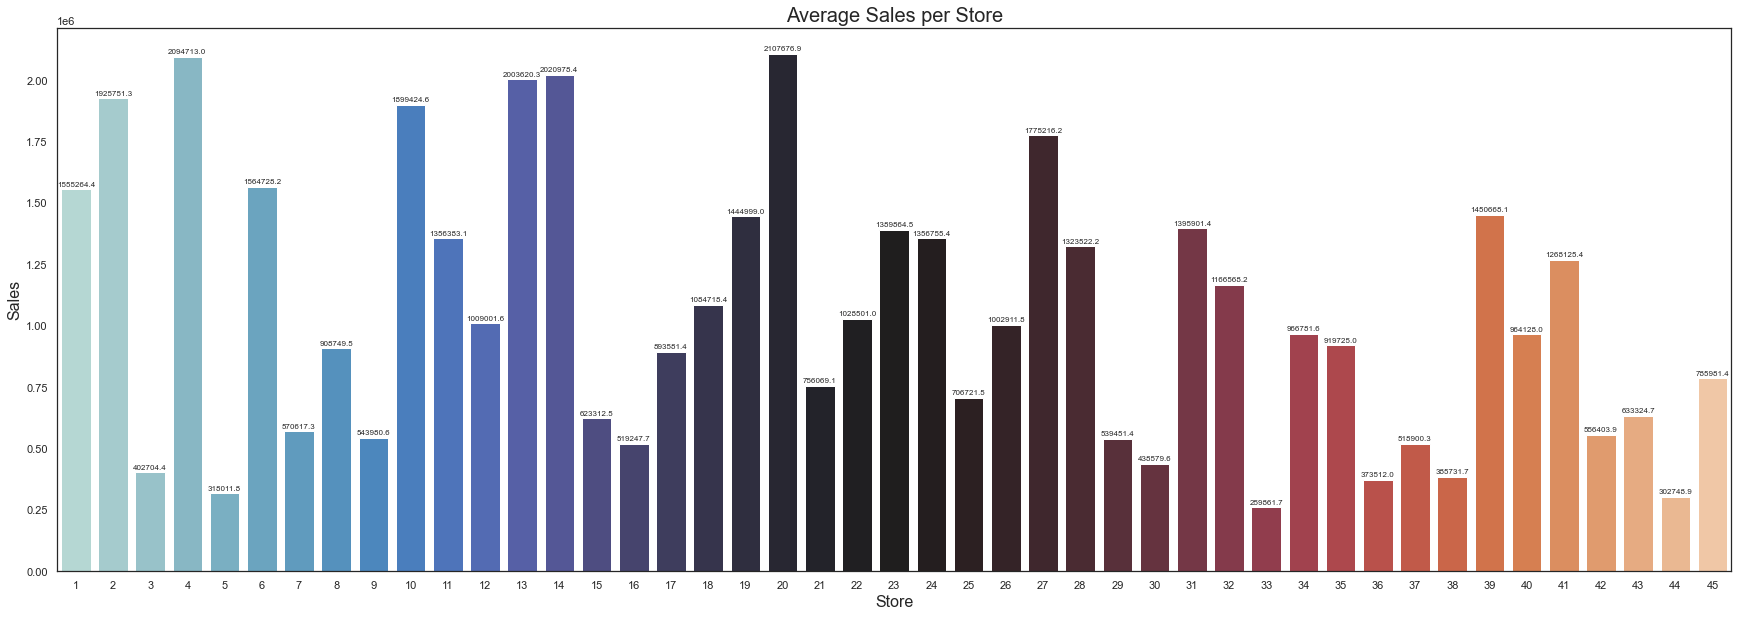

In [35]:
## Stores with highest sales

weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()
plt.figure(figsize=(30,10))
splot = sns.barplot(weekly_sales.index, weekly_sales.values, palette='icefire')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=8,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

#plt.grid()

plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

In [36]:
df1=df[['Store', 'Weekly_Sales']]
df1

#dfgrp=df1.groupby('Store')
#dfgrp
dfgrpsales=df1.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total sales").sort_values(by="Total sales",ascending=False)
dfgrpsales.head(20)

,Store,Total sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


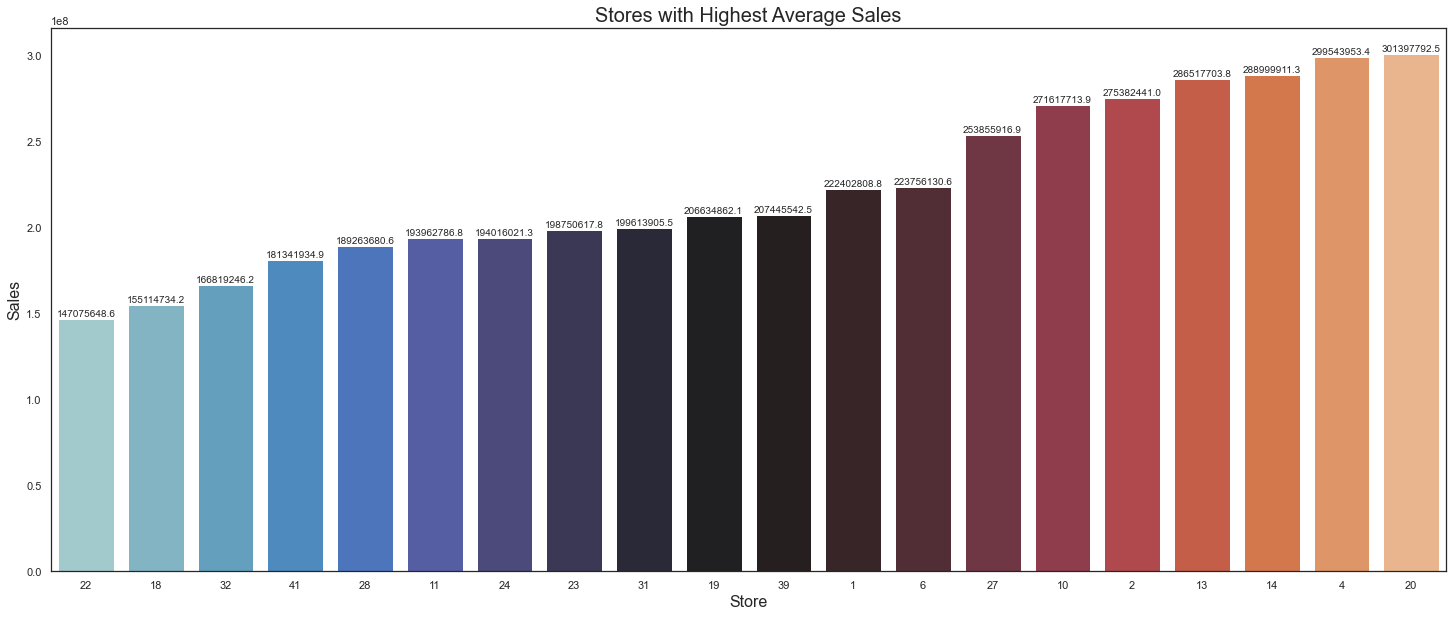

In [37]:
## Stores with highest sales

#_sales = dfgrpsales["Total sales"].groupby(df['Store']).mean()
plt.figure(figsize=(25,10))
splotn = sns.barplot(x='Store', y='Total sales', data =dfgrpsales.head(20), palette='icefire', order=dfgrpsales.head(20).sort_values('Total sales').Store)
for p in splotn.patches:
    splotn.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
#plt.grid()
plt.title('Stores with Highest Average Sales', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

In [38]:
df2=df[['Store', 'Temperature']]
df2

dfgrptemp=df2.groupby("Store")["Temperature"].mean().reset_index(name="Temperature").sort_values(by="Temperature",ascending=True)
dfgrptemp.head(20)

,Store,Temperature
6,7,39.720280
25,26,43.658252
15,16,45.030070
16,17,46.387203
39,40,47.674545
40,41,48.410350
22,23,48.805105
14,15,51.833846
24,25,52.138392
18,19,52.295035


In [39]:
df3=df[['Store', 'Unemployment']]
df3

dfgrptemp=df3.groupby("Store")["Unemployment"].mean().reset_index(name="Unemployment").sort_values(by="Unemployment",ascending=True)
dfgrptemp.head(20)

,Store,Unemployment
22,23,4.796014
39,40,4.796014
3,4,5.964692
7,8,6.091846
8,9,6.099881
4,5,6.295406
15,16,6.477993
16,17,6.549406
5,6,6.606902
43,44,6.735622


In [40]:
df4=df[['Store', 'CPI']]
df4

dfgrptemp=df4.groupby("Store")["CPI"].mean().reset_index(name="CPI").sort_values(by="CPI",ascending=False)
dfgrptemp.head(20)

,Store,CPI
8,9,219.626689
7,8,219.439026
10,11,219.391531
2,3,219.391531
5,6,217.553197
4,5,216.565581
0,1,215.996892
1,2,215.646311
30,31,215.646311
29,30,215.646311


In [41]:
df5=df[['Store', 'Fuel_Price']]
df5

dfgrptemp=df5.groupby("Store")["Fuel_Price"].mean().reset_index(name="Fuel").sort_values(by="Fuel",ascending=True)
dfgrptemp.head(20)

,Store,Fuel
35,36,3.196986
33,34,3.210706
3,4,3.210706
0,1,3.213126
20,21,3.213126
36,37,3.213126
38,39,3.213126
30,31,3.213126
10,11,3.213126
29,30,3.213126


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Temperature'>

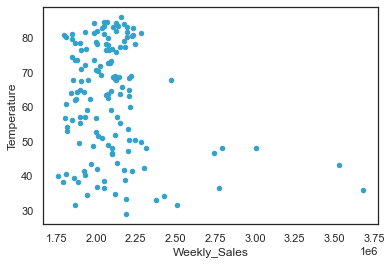

In [42]:
#dfnew['Weekly_Sales'].plot()
dfstore4=df.loc[(df['Store']==4)]
dfstore4.plot.scatter(x='Weekly_Sales',
                      y='Temperature',
                      c='#33A1C9')
#<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Fuel_Price'>

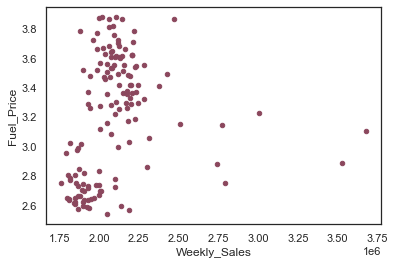

In [43]:
#dfnew['Weekly_Sales'].plot()
dfstore4=df.loc[(df['Store']==4)]
dfstore4.plot.scatter(x='Weekly_Sales',
                      y='Fuel_Price',
                      c='#8B475D')
#<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

In [44]:
#dfnew['Weekly_Sales'].plot()
dfstoretop5=df.loc[(df['Store']==4) | (df['Store']==20) | (df['Store']==14) | (df['Store']==13) | (df['Store']==2)]
dfstoretop5

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,week,month,year
143,2,2011-09-30,1650394.44,0,78.14,3.355,216.362033,7.852,4,39,9,2011
144,2,2012-01-27,1660906.14,0,50.50,3.290,219.718864,7.057,4,4,1,2012
145,2,2011-09-23,1669299.78,0,75.58,3.467,216.028236,7.852,4,38,9,2011
146,2,2011-07-29,1680693.06,0,90.07,3.682,215.136382,7.852,4,30,7,2011
147,2,2011-05-20,1688281.86,0,67.14,3.907,215.383478,7.931,4,20,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2855,20,2010-11-26,2811634.04,1,46.66,3.039,204.962100,7.484,4,47,11,2010
2856,20,2010-12-17,2819193.17,0,24.07,3.140,204.632119,7.484,4,50,12,2010
2857,20,2011-11-25,2906233.25,1,46.38,3.492,211.412076,7.082,4,47,11,2011
2858,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082,4,51,12,2011


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Unemployment'>

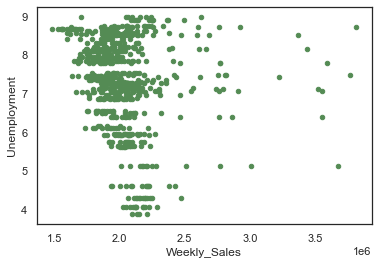

In [45]:
dfstoretop5.plot.scatter(x='Weekly_Sales',
                         y='Unemployment',
                         c='#548B54')
#<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

In [46]:
from sklearn.model_selection import train_test_split
X=df.drop(['Weekly_Sales','Date'],axis=1)
y=df['Weekly_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [47]:
## Encoding the Categorical Columns

dummies=pd.get_dummies(df[["Holiday_Flag", "Store","weekday","month","year"]], columns=["Holiday_Flag", "Store","weekday","month","year"], prefix=["Holiday_Flag", "Store","weekday","month","year"],drop_first=True)

In [48]:
#columns=["Store", "Holiday_Flag","weekday","month","year"]
X = pd.concat([X, dummies], axis=1)

In [49]:
columns=["Store", "Holiday_Flag"]
X.drop(columns, axis = 1, inplace=True)

In [50]:
X.head()

,Temperature,Fuel_Price,CPI,Unemployment,weekday,week,month,year,Holiday_Flag_1,Store_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,43.83,3.010,212.197058,7.742,4,4,1,2011,0,0,...,0,0,0,0,0,0,0,0,1,0
1,54.26,3.290,220.078852,7.348,4,4,1,2012,0,0,...,0,0,0,0,0,0,0,0,0,1
2,44.04,3.016,211.827234,7.742,4,3,1,2011,0,0,...,0,0,0,0,0,0,0,0,1,0
3,69.86,2.725,211.861294,7.838,4,42,10,2010,0,0,...,0,0,0,0,0,1,0,0,0,0
4,80.94,2.624,211.597225,7.787,4,38,9,2010,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     6435 non-null   float64
 1   Fuel_Price      6435 non-null   float64
 2   CPI             6435 non-null   float64
 3   Unemployment    6435 non-null   float64
 4   weekday         6435 non-null   int64  
 5   week            6435 non-null   int64  
 6   month           6435 non-null   int64  
 7   year            6435 non-null   int64  
 8   Holiday_Flag_1  6435 non-null   uint8  
 9   Store_2         6435 non-null   uint8  
 10  Store_3         6435 non-null   uint8  
 11  Store_4         6435 non-null   uint8  
 12  Store_5         6435 non-null   uint8  
 13  Store_6         6435 non-null   uint8  
 14  Store_7         6435 non-null   uint8  
 15  Store_8         6435 non-null   uint8  
 16  Store_9         6435 non-null   uint8  
 17  Store_10        6435 non-null   u

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)
X_train.head()

,Temperature,Fuel_Price,CPI,Unemployment,weekday,week,month,year,Holiday_Flag_1,Store_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
1155,43.83,2.561,214.878045,6.415,4,8,2,2010,0,0,...,0,0,0,0,0,0,0,0,0,0
3532,58.21,3.848,214.548557,7.139,4,20,5,2012,0,0,...,1,0,0,0,0,0,0,0,0,1
3972,50.01,3.203,126.793400,14.313,1,41,10,2010,0,0,...,0,0,0,0,0,1,0,0,0,0
283,62.98,2.735,211.406287,8.163,4,47,11,2010,1,1,...,0,0,0,0,0,0,1,0,0,0
6233,52.40,3.770,129.089000,6.906,4,19,5,2011,0,0,...,1,0,0,0,0,0,0,0,1,0


In [53]:
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    i.fit(X_train,y_train)
    scores_train.append(i.score(X_train, y_train))
    scores_test.append(i.score(X_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))

In [54]:
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor']))

                            Train RMSE      Test RMSE  Training Score  \
Linear Regression        144292.189330  153796.506068        0.934094   
Decision Tree Regressor       0.000000  180089.006541        1.000000   
Random Forest Regressor   51498.060776  131413.091509        0.991605   

                         Test Score  
Linear Regression          0.927058  
Decision Tree Regressor    0.899987  
Random Forest Regressor    0.946745  


In [55]:
dtr.feature_importances_


array([1.14331888e-02, 6.55661470e-03, 3.62980928e-02, 1.70040285e-02,
       1.22767069e-03, 3.05939697e-02, 1.87690997e-03, 9.04964796e-05,
       1.26580684e-03, 6.88340604e-02, 6.13797741e-03, 8.37308519e-02,
       2.09022061e-02, 3.12048653e-02, 1.14919830e-04, 3.39702965e-03,
       9.16978630e-03, 6.54379917e-02, 1.86110091e-02, 1.16807552e-05,
       8.00400664e-02, 7.87944646e-02, 7.06905558e-03, 2.05470416e-05,
       5.18190408e-04, 1.00027307e-03, 1.91795375e-02, 8.29456699e-02,
       4.92518641e-03, 1.75295373e-04, 1.90084553e-02, 1.96472187e-02,
       6.05169535e-04, 4.83316232e-05, 4.92999051e-02, 1.99370236e-02,
       9.48695550e-03, 9.37385460e-03, 1.98308783e-02, 1.13265024e-02,
       2.51846439e-02, 3.95130469e-05, 1.34908159e-03, 6.00372735e-03,
       1.04505121e-02, 1.55234691e-02, 2.82800793e-02, 1.24141808e-05,
       1.56342280e-02, 8.04151360e-03, 6.40257853e-03, 2.44921682e-02,
       6.81732678e-04, 8.89964248e-05, 1.99196761e-04, 3.74356049e-05,
      

In [58]:
feature_df=pd.DataFrame(dtr.feature_importances_, columns = ["Top 5 Most Important Stores"], index = X_train.columns).sort_values('Top 5 Most Important Stores',ascending=False)

In [59]:
feature_df.head(5)


,Top 5 Most Important Stores
Store_4,0.083731
Store_20,0.082946
Store_13,0.080040
Store_14,0.078794
Store_2,0.068834
